<a href="https://colab.research.google.com/github/priyanu17/case_studies/blob/master/Income_Classification_For_Donation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Classification 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [126]:
# PROBLEM STATEMENT : 

# Classify data into high and low income groups
# Supervised Modelling
# High income group can be targeted for donations

In [127]:
census_data = pd.read_csv("CS_3_donations_adult.data")
census_data_test = pd.read_csv("CS_3_donations_adult.test")

In [128]:
census_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [129]:
census_data_test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [130]:
# Column header is missing in the dataframe

print(census_data.shape)
print(census_data_test.shape)

(32560, 15)
(16280, 15)


In [131]:
cols_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
              "marital_status", "occupation", "relationship", "race", "sex",
              "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [132]:
# loading data with column names

census_data = pd.DataFrame(census_data.values, columns=cols_names)
census_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [133]:
census_data_test = pd.DataFrame(census_data_test.values, columns=cols_names)
census_data_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [134]:
# column headers have now been included 

In [135]:
# concat both train and test dataframes

census_data = pd.concat((census_data, census_data_test), ignore_index=True)

In [136]:
census_data.shape

(48840, 15)

In [137]:
census_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48836,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48837,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48838,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [138]:
# info on data:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  object
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  object
 3   education       48840 non-null  object
 4   education_num   48840 non-null  object
 5   marital_status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  object
 11  capital_loss    48840 non-null  object
 12  hours_per_week  48840 non-null  object
 13  native_country  48840 non-null  object
 14  income          48840 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


In [139]:
# all columns are of dtype 'object'
census_data = census_data.infer_objects()

In [140]:
# checking for info again
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education_num   48840 non-null  int64 
 5   marital_status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  int64 
 11  capital_loss    48840 non-null  int64 
 12  hours_per_week  48840 non-null  int64 
 13  native_country  48840 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [141]:
# numeric columns have been identified

In [142]:
# describe on dataset

census_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [143]:
# checking for duplicates in the dataset

census_data.duplicated(keep = 'first').value_counts()

False    48811
True        29
dtype: int64

In [144]:
# drop duplicate rows from the dataframe

census_data = census_data.drop_duplicates(keep = 'first', ignore_index=True)

In [145]:
# shape of dataset
census_data.shape

(48811, 15)

In [146]:
# check for duplicates now
census_data.duplicated(keep = 'first').value_counts()

False    48811
dtype: int64

In [147]:
# no duplicate rows present now

In [148]:
# nunique()
census_data.nunique()

age                  74
workclass             9
fnlwgt            28521
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        123
capital_loss         99
hours_per_week       96
native_country       42
income                4
dtype: int64

In [149]:
# no constant feature columns are present

In [150]:
# checking "education" and "education_num" 
# groupby "education"

census_data.groupby("education")["education_num"].nunique()

education
 10th            1
 11th            1
 12th            1
 1st-4th         1
 5th-6th         1
 7th-8th         1
 9th             1
 Assoc-acdm      1
 Assoc-voc       1
 Bachelors       1
 Doctorate       1
 HS-grad         1
 Masters         1
 Preschool       1
 Prof-school     1
 Some-college    1
Name: education_num, dtype: int64

In [151]:
# education and education num denote same information
# drop "education_num"

census_data = census_data.drop(columns = ["education_num"])

In [152]:
# value_counts()

for column in census_data.columns[:8]:
  print("column is : " , column)
  print(census_data[column].value_counts())
  print("\n")

column is :  age
36    1348
35    1336
33    1335
23    1328
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64


column is :  workclass
 Private             33878
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64


column is :  fnlwgt
203488    21
190290    19
120277    19
126569    18
125892    18
          ..
284952     1
170272     1
137444     1
172327     1
208174     1
Name: fnlwgt, Length: 28521, dtype: int64


column is :  education
 HS-grad         15777
 Some-college    10869
 Bachelors        8019
 Masters          2656
 Assoc-voc        2060
 11th             1811
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         5

In [153]:
# value_counts()

for column in census_data.columns[8:]:
  print("column is : " , column)
  print(census_data[column].value_counts())
  print("\n")

column is :  sex
 Male      32629
 Female    16182
Name: sex, dtype: int64


column is :  capital_gain
0        44777
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital_gain, Length: 123, dtype: int64


column is :  capital_loss
0       46529
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital_loss, Length: 99, dtype: int64


column is :  hours_per_week
40    22785
50     4244
45     2716
60     2177
35     1935
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours_per_week, Length: 96, dtype: int64


column is :  native_country
 United-States                 43808
 Mexico                          947
 ?                               856
 Philippines                     295
 Germany                         206
 Puerto-Rico                     18

In [154]:
# Data Cleaning : 

In [155]:
# Target variable

census_data["income"].value_counts().index.to_list()

[' <=50K', ' <=50K.', ' >50K', ' >50K.']

In [156]:
# replacing "income" column entries with appropriate values

census_data["income"] = census_data['income'].replace(census_data["income"].value_counts().index.to_list(), ['low', 'low', 'high', 'high'])

In [157]:
census_data["income"].value_counts().index.to_list()

['low', 'high']

In [158]:
# filling '?' with NAN
census_data = census_data.replace(['?', ' ?', '? '] , np.NaN)

In [159]:
# Income distribution in the data:

total_number_of_people = census_data.shape[0]

high_income_group = census_data[census_data['income'] == 'high'].shape[0]

low_income_group = census_data[census_data['income'] == 'low'].shape[0]

high_income_percentage = round((high_income_group/ total_number_of_people)*100, 2)

low_income_percentage = round((low_income_group/ total_number_of_people)*100, 2)

print("\nTotal nuuber of people in the dataset : " , total_number_of_people)
print("\nNumber of people in the high income group : " , high_income_group)
print("\nNUmber of people in the low income group : " , low_income_group)
print("\nPercentage of people in the high incmoe group : ", high_income_percentage)
print("\nPercenatge of people in the low income group : " , low_income_percentage)


Total nuuber of people in the dataset :  48811

Number of people in the high income group :  11685

NUmber of people in the low income group :  37126

Percentage of people in the high incmoe group :  23.94

Percenatge of people in the low income group :  76.06


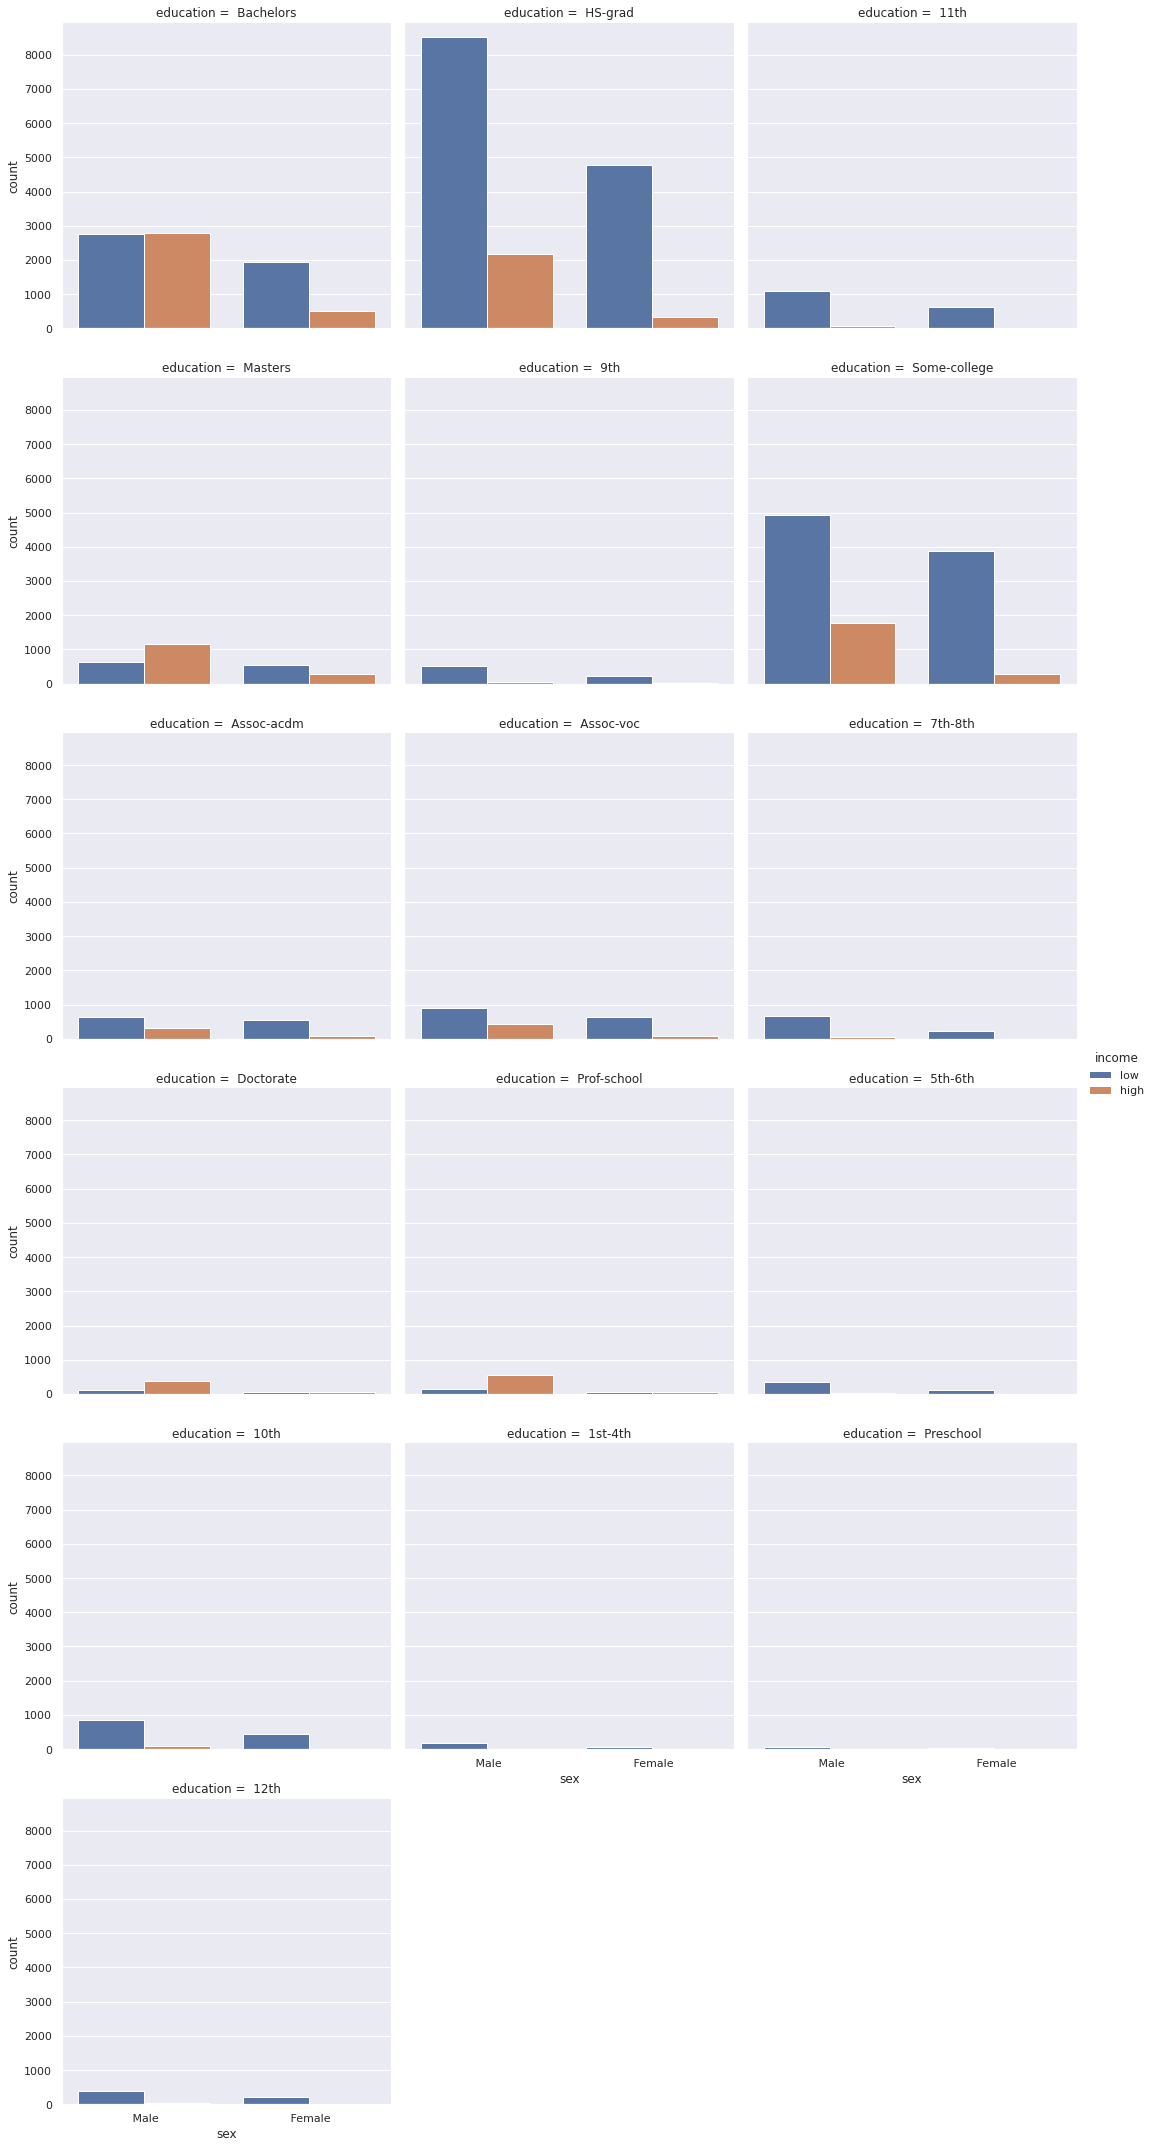

In [160]:
# Visualization on the income

sns.set(style='darkgrid', color_codes=True)
sns.factorplot('sex', col='education', data=census_data, hue='income', kind='count', col_wrap= 3)

In [161]:
# Observations :

# Number of educated men is higher than the number of educated women at all education levels
# Number of 'high' income men is higher htan the number of 'high' income women at all education levels

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8da7798d0>]],
      dtype=object)

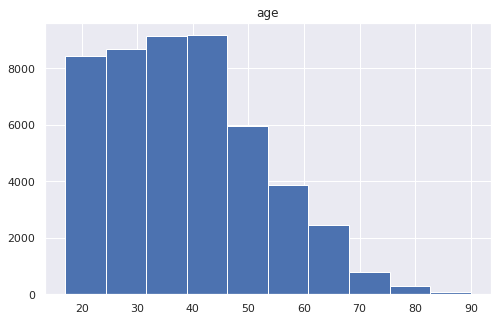

In [162]:
# age
census_data.hist(column = 'age',figsize = (8, 5))

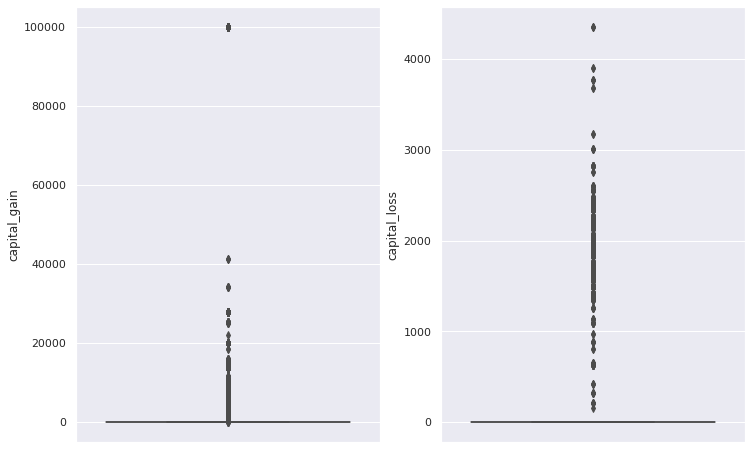

In [163]:
# boxplots : 

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot( y = 'capital_gain', data = census_data, ax = ax[0])
sns.boxplot( y = 'capital_loss', data = census_data, ax = ax[1])



In [164]:
# changing the scale of "capital_gain" and "capital_loss" into the logarithmic scale

skewed = ["capital_gain", "capital_loss"]
census_data[skewed] = census_data[skewed].apply(lambda x : np.log(x+1))
census_data.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,low
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,low
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,low
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,low
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,low


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8da64e470>],
      dtype=object)

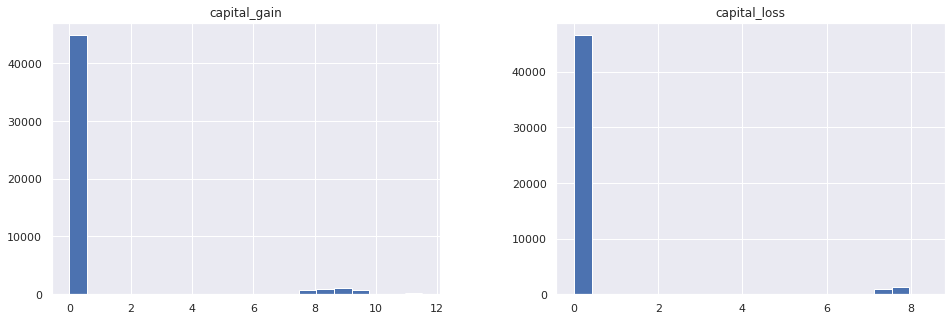

In [165]:
# viewing the logarithmic scale

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
census_data.hist(column="capital_gain", bins = 20, ax = axes[0])
census_data.hist(column="capital_loss", bins = 20, ax = axes[1])

In [166]:
# drop "fnlwgt"
census_data = census_data.drop(columns = ["fnlwgt"])

In [167]:
# check for nulls

census_data.isna().sum()

age                  0
workclass         2799
education            0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

In [168]:
# null percentage

round((census_data.isna().sum()/census_data.shape[0])*100, 2)

age               0.00
workclass         5.73
education         0.00
marital_status    0.00
occupation        5.75
relationship      0.00
race              0.00
sex               0.00
capital_gain      0.00
capital_loss      0.00
hours_per_week    0.00
native_country    1.75
income            0.00
dtype: float64

In [169]:
# drop rows with null values (nulls are < 6%)

census_data = census_data.dropna()

In [170]:
# shape of dataset :

census_data.shape

(45192, 13)

In [171]:
# checking nulls 
census_data.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [172]:
# Data Preparation

In [173]:
census_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,low
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,low
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,low
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,low
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,low


In [174]:
census_data.nunique()

age                74
workclass           7
education          16
marital_status      7
occupation         14
relationship        6
race                5
sex                 2
capital_gain      121
capital_loss       97
hours_per_week     96
native_country     41
income              2
dtype: int64

In [175]:
# LabelEncoding of Target variable

census_data["income"] = census_data["income"].apply(lambda x: 0 if x == "low" else 1)

In [176]:
# find binary columns

binary_columns = census_data.nunique()[census_data.nunique() == 2].index.to_list()
binary_columns.remove('income')
binary_columns

['sex']

In [177]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in binary_columns:
  census_data[column] = le.fit_transform(census_data[column])

In [178]:
census_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13,United-States,0
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40,United-States,0
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40,United-States,0
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40,Cuba,0
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,0,0.0,0.0,40,United-States,0


In [179]:
# find categorical columns to one hot encode

cat_columns = census_data.nunique()[(census_data.nunique() > 2 ) & (census_data.nunique() < 45)].index.to_list()
cat_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [180]:
# One Hot encoding
census_data = pd.get_dummies(data = census_data, columns = cat_columns, drop_first = True)
census_data.head()

,age,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,1,0.0,0.0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,1,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,1,0.0,0.0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,0,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,0,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [181]:
census_data.shape

(45192, 95)

In [182]:
# 95 columns are present after creating dummy variables

In [183]:
# find highest correlation values in the dataframe

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [184]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(census_data, 10))

Top Absolute Correlations
race_ Black                         race_ White                           0.796843
marital_status_ Married-civ-spouse  marital_status_ Never-married         0.644302
                                    relationship_ Not-in-family           0.549482
age                                 marital_status_ Never-married         0.526845
workclass_ Private                  workclass_ Self-emp-not-inc           0.506082
marital_status_ Never-married       relationship_ Own-child               0.498339
native_country_ Mexico              native_country_ United-States         0.462013
workclass_ Local-gov                workclass_ Private                    0.453608
income                              marital_status_ Married-civ-spouse    0.446119
sex                                 marital_status_ Married-civ-spouse    0.438193
dtype: float64


In [185]:
# spilt data in train and test
from sklearn.model_selection import train_test_split

X = census_data.drop(columns = ["income"]).values
y = census_data["income"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [186]:
print("Number of elements in the training set : ", len(X_train))
print("Number of elements in the test set : ", len(X_test))

Number of elements in the training set :  33894
Number of elements in the test set :  11298


In [187]:
# get index of Numberic Columns
print(census_data.columns.get_loc("age"))
print(census_data.columns.get_loc("capital_gain"))
print(census_data.columns.get_loc("capital_loss"))
print(census_data.columns.get_loc("hours_per_week"))


0
2
3
4


In [188]:
# Feature Scaling (normalization)

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
X_train[: , [0, 2, 3, 4]] = minmaxscaler.fit_transform(X_train[: , [0, 2, 3, 4]])
X_test[: , [0, 2, 3, 4]] = minmaxscaler.transform(X_test[: , [0, 2, 3, 4]])


In [189]:
X_train[: , [0, 2, 3, 4]]

array([[0.36986301, 0.        , 0.        , 0.60204082],
       [0.20547945, 0.        , 0.        , 0.47959184],
       [0.38356164, 0.        , 0.        , 0.39795918],
       ...,
       [0.32876712, 0.        , 0.        , 0.5       ],
       [0.5890411 , 0.        , 0.        , 0.19387755],
       [0.31506849, 0.        , 0.        , 0.39795918]])

In [190]:
# Data Modelling :

In [191]:
# Model 1 : Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'saga', max_iter = 200, multi_class = 'ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
y_pred_LR = log_reg.predict(X_test)
score_LR = log_reg.score(X_test, y_test)
print("Accuracy of Logistic Regression : " + str(score_LR))

Accuracy of Logistic Regression : 0.8420959461851655


In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Logistic Regression model : ")
print(confusion_matrix(y_test, y_pred_LR))

print()

print("Classification Report for the Logistic Regression model : ")
print(classification_report(y_test, y_pred_LR))

Confusion Matrix for the Logistic Regression model : 
[[7830  611]
 [1173 1684]]

Classification Report for the Logistic Regression model : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8441
           1       0.73      0.59      0.65      2857

    accuracy                           0.84     11298
   macro avg       0.80      0.76      0.78     11298
weighted avg       0.84      0.84      0.84     11298



In [194]:
# Feature Importances :Logistic Regression model

# coefficients of the features in the decision function
coef = log_reg.coef_[0]
coef

array([ 1.72700898,  0.65413954,  2.42893151,  1.17091773,  2.64269067,
       -0.5640773 , -0.40794641, -0.22710391, -0.91140329, -0.7279504 ,
       -0.80769074, -0.1728717 ,  0.11468232, -0.73289324, -0.56134426,
       -0.70165837, -0.53486075,  1.16188033,  1.06338139,  1.7144076 ,
        2.57021314,  0.58790231,  2.08148698, -0.58376506,  2.68129479,
        0.92980763,  1.90402608,  2.03590406,  0.39046141, -0.44144997,
       -0.13388996,  0.15460036, -0.13642897,  0.03286737,  0.77444265,
       -0.96270533, -0.73403325, -0.37639441, -0.84871255, -1.2443751 ,
        0.52832734,  0.47326594,  0.25512126,  0.52267966, -0.16219279,
        0.31476134, -0.64604607, -0.61496988,  0.08858726,  0.99932959,
        0.62450443,  0.30156475,  0.45713129,  0.47411459,  0.48160061,
       -0.21817606, -1.2702316 ,  0.064453  , -0.20682938, -0.27149072,
       -0.01955422,  0.39902877,  0.83064903, -0.0260376 , -0.15865192,
       -1.04211801,  0.4735352 ,  0.        ,  0.15785247, -0.06

In [195]:
coef = [abs(x) for x in (list(coef))]

In [196]:
cols = list(census_data.columns)
cols.remove("income")

In [197]:
log_reg_column_coef = pd.DataFrame(data = {"Columns" : cols, "Coefficient" : coef} )
log_reg_column_coef

,Columns,Coefficient
0,age,1.727009
1,sex,0.654140
2,capital_gain,2.428932
3,capital_loss,1.170918
4,hours_per_week,2.642691
...,...,...
89,native_country_ Thailand,0.662774
90,native_country_ Trinadad&Tobago,0.472996
91,native_country_ United-States,0.276922
92,native_country_ Vietnam,0.704872


In [198]:
# here the order of columns denotes how strongly correlated they are to the target variable 

log_reg_column_coef.sort_values(by = ["Coefficient"], ascending= False)[:15]

,Columns,Coefficient
24,education_ Prof-school,2.681295
4,hours_per_week,2.642691
20,education_ Doctorate,2.570213
2,capital_gain,2.428932
22,education_ Masters,2.081487
27,marital_status_ Married-civ-spouse,2.035904
26,marital_status_ Married-AF-spouse,1.904026
0,age,1.727009
19,education_ Bachelors,1.714408
56,native_country_ Columbia,1.270232


In [199]:
# Top 15 most influential columns are as above

In [200]:
# Model 2 : Support Vector Classifier

X_train_svm, X_test_svm, y_train_svm, y_test_svm = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [201]:
# Feature Scaling for SVM

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_svm[: , [4, 7, 8]] = sc.fit_transform(X_train_svm[: , [4, 7, 8]])
X_test_svm[: , [4, 7, 8]] = sc.transform(X_test_svm[: , [4, 7, 8]])

In [202]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem

svm_clf = LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                 random_state=1,
                                 n_components=300)
X_train_svm = feature_map_nystroem.fit_transform(X_train_svm)
X_test_svm = feature_map_nystroem.transform(X_test_svm)

In [203]:
svm_clf.fit(X_train_svm, y_train_svm)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [204]:
y_pred_svm = svm_clf.predict(X_test_svm)

In [205]:
# Accuracy of SVM Model :
score_svm = svm_clf.score(X_test_svm, y_test_svm)
print("Accuracy of the SVM Classifier : " + str(score_svm))

Accuracy of the SVM Classifier : 0.8366967604885821


In [206]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the SVM model : ")
print(confusion_matrix(y_test_svm, y_pred_svm))

print()

print("Classification Report for the SVM model : ")
print(classification_report(y_test_svm, y_pred_svm))

Confusion Matrix for the SVM model : 
[[7826  615]
 [1230 1627]]

Classification Report for the SVM model : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8441
           1       0.73      0.57      0.64      2857

    accuracy                           0.84     11298
   macro avg       0.79      0.75      0.77     11298
weighted avg       0.83      0.84      0.83     11298



In [207]:
# Model 3 : Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

de_tree_clf = DecisionTreeClassifier()
de_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
y_pred_dt = de_tree_clf.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

In [209]:
# Accuracy of Decision Tree Classifier 
accuracy_score_dt = de_tree_clf.score(X_test, y_test)
print("Accuracy of the Decision Tree Classifier : " + str(accuracy_score_dt))

Accuracy of the Decision Tree Classifier : 0.8169587537617278


In [210]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Decision Tree model : ")
print(confusion_matrix(y_test, y_pred_dt))

print()

print("Classification Report for the Decision Tree Classifier model : ")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix for the Decision Tree model : 
[[7516  925]
 [1143 1714]]

Classification Report for the Decision Tree Classifier model : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8441
           1       0.65      0.60      0.62      2857

    accuracy                           0.82     11298
   macro avg       0.76      0.75      0.75     11298
weighted avg       0.81      0.82      0.81     11298



In [211]:
de_tree_clf.feature_importances_

array([1.72454579e-01, 1.08499089e-02, 1.39769851e-01, 4.51361217e-02,
       9.65513064e-02, 8.42742102e-03, 1.48034027e-02, 7.84223382e-03,
       1.19067973e-02, 6.95577675e-03, 9.63919307e-06, 1.51203848e-03,
       9.62520207e-04, 5.84537163e-06, 7.07982981e-04, 2.46652864e-03,
       1.19501772e-03, 5.35842001e-03, 4.66610042e-03, 3.07696003e-02,
       4.12334692e-03, 7.53906219e-03, 1.26870650e-02, 1.69840713e-04,
       5.58254290e-03, 7.16495941e-03, 4.95933398e-04, 2.14634348e-01,
       1.57887050e-03, 4.80661471e-03, 2.06114358e-03, 2.47569569e-03,
       0.00000000e+00, 9.36176849e-03, 2.43706566e-02, 5.48875748e-03,
       3.58432337e-03, 4.86946110e-03, 5.76011197e-03, 1.02272445e-04,
       2.93391949e-02, 5.54740542e-03, 9.66511596e-03, 5.90817513e-03,
       7.14161462e-03, 4.36794335e-03, 2.20617734e-03, 2.33314220e-03,
       2.37080720e-03, 7.36481436e-03, 3.46431741e-03, 7.78027025e-03,
       8.72784077e-04, 7.39944919e-03, 1.25231245e-03, 4.86319335e-04,
      

In [212]:
feature_importances_dt = pd.DataFrame(de_tree_clf.feature_importances_,
                                   index = cols,
                                   columns = ["importance"]).sort_values('importance', ascending = False)
feature_importances_dt = feature_importances_dt.reset_index()
feature_importances_dt[:15]

,index,importance
0,marital_status_ Married-civ-spouse,0.214634
1,age,0.172455
2,capital_gain,0.139770
3,hours_per_week,0.096551
4,capital_loss,0.045136
5,education_ Bachelors,0.030770
6,occupation_ Prof-specialty,0.029339
7,occupation_ Exec-managerial,0.024371
8,workclass_ Private,0.014803
9,education_ Masters,0.012687


In [213]:
# Top 15 important features for the Decision Tree Classifier

In [214]:
# Model 4 : Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 200, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [215]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


array([0, 0, 0, ..., 0, 0, 1])

In [216]:
# Accuracy of Random Forest Classifier 
accuracy_score_rf = rf_clf.score(X_test, y_test)
print("Accuracy of the Random Forest Classifier : " + str(accuracy_score_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of the Random Forest Classifier : 0.8417419012214551


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Random Forest model : ")
print(confusion_matrix(y_test, y_pred_rf))

print()

print("Classification Report for the Random Forest Classifier model : ")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix for the Random Forest model : 
[[7768  673]
 [1115 1742]]

Classification Report for the Random Forest Classifier model : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8441
           1       0.72      0.61      0.66      2857

    accuracy                           0.84     11298
   macro avg       0.80      0.77      0.78     11298
weighted avg       0.84      0.84      0.84     11298



In [218]:
rf_clf.feature_importances_

array([2.41624714e-01, 1.90584382e-02, 1.17923147e-01, 3.70445612e-02,
       1.17274738e-01, 7.06185454e-03, 1.28317099e-02, 7.33271834e-03,
       9.97287619e-03, 5.70621460e-03, 1.80327159e-04, 3.72628046e-03,
       1.41326774e-03, 5.60264547e-04, 1.44931306e-03, 3.78656584e-03,
       2.46366324e-03, 4.82874400e-03, 5.26563809e-03, 2.38823836e-02,
       6.22502318e-03, 1.38078157e-02, 1.73345533e-02, 1.36684869e-04,
       1.07132911e-02, 9.48328775e-03, 3.59700253e-04, 9.23516600e-02,
       1.42461131e-03, 3.05750680e-02, 2.70143675e-03, 2.54471800e-03,
       4.15362338e-05, 8.12775064e-03, 2.21808011e-02, 5.72326301e-03,
       3.98900300e-03, 4.75461268e-03, 8.81884382e-03, 2.22236361e-04,
       2.16689571e-02, 3.69136282e-03, 8.12843840e-03, 5.41790528e-03,
       5.20825575e-03, 1.69646473e-02, 2.62655493e-03, 1.11063137e-02,
       9.93894589e-03, 8.09807784e-03, 3.45658735e-03, 5.40149244e-03,
       9.31223062e-04, 7.50849750e-03, 1.36640963e-03, 6.84378392e-04,
      

In [219]:
feature_importances_rf = pd.DataFrame(rf_clf.feature_importances_,
                                   index = cols,
                                   columns = ["importance"]).sort_values('importance', ascending = False)
feature_importances_rf = feature_importances_rf.reset_index()
feature_importances_rf[:15]

,index,importance
0,age,0.241625
1,capital_gain,0.117923
2,hours_per_week,0.117275
3,marital_status_ Married-civ-spouse,0.092352
4,capital_loss,0.037045
5,marital_status_ Never-married,0.030575
6,education_ Bachelors,0.023882
7,occupation_ Exec-managerial,0.022181
8,occupation_ Prof-specialty,0.021669
9,sex,0.019058


In [220]:
# Top 15 significant features for the random forest classifier

In [221]:
# Model 5 : ADABoostClassifier

from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators = 100, algorithm = "SAMME")
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [222]:
y_pred_ab = ab_clf.predict(X_test)
y_pred_ab

array([0, 0, 0, ..., 0, 0, 1])

In [223]:
# Accuracy of AdaBoost Classifier 
accuracy_score_ab = ab_clf.score(X_test, y_test)
print("Accuracy of the AdaBoost Classifier : " + str(accuracy_score_ab))

Accuracy of the AdaBoost Classifier : 0.8443087272083555


In [224]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the AdaBoost model : ")
print(confusion_matrix(y_test, y_pred_ab))

print()

print("Classification Report for the AdaBoost Classifier model : ")
print(classification_report(y_test, y_pred_ab))

Confusion Matrix for the AdaBoost model : 
[[7896  545]
 [1214 1643]]

Classification Report for the AdaBoost Classifier model : 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8441
           1       0.75      0.58      0.65      2857

    accuracy                           0.84     11298
   macro avg       0.81      0.76      0.78     11298
weighted avg       0.84      0.84      0.84     11298



In [225]:
ab_clf.feature_importances_

array([0.08983188, 0.        , 0.23853   , 0.07361898, 0.05299381,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02284762, 0.        , 0.        , 0.01995921,
       0.02420431, 0.01898317, 0.        , 0.        , 0.01525728,
       0.01204771, 0.01856437, 0.01795975, 0.        , 0.02971245,
       0.        , 0.        , 0.172915  , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04185189,
       0.03307562, 0.01220072, 0.00825715, 0.02097925, 0.        ,
       0.04506124, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00838457, 0.        , 0.01028736,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [226]:
feature_importances_ab = pd.DataFrame(ab_clf.feature_importances_,
                                   index = cols,
                                   columns = ["importance"]).sort_values('importance', ascending = False)
feature_importances_ab = feature_importances_ab.reset_index()
feature_importances_ab[:15]

,index,importance
0,capital_gain,0.238530
1,marital_status_ Married-civ-spouse,0.172915
2,age,0.089832
3,capital_loss,0.073619
4,hours_per_week,0.052994
5,occupation_ Prof-specialty,0.045061
6,occupation_ Exec-managerial,0.041852
7,occupation_ Farming-fishing,0.033076
8,education_ Prof-school,0.029712
9,education_ 7th-8th,0.024204


In [227]:
# Top 15 features for AdaBoost Classifier

In [228]:
# Model 6 : GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [229]:
y_pred_gb = gb_clf.predict(X_test)
y_pred_gb

array([0, 0, 0, ..., 0, 0, 1])

In [230]:
# accuracy of GradientBoosting Classifier
from sklearn.metrics import accuracy_score

accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_gb

0.8582935032749159

In [231]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the GradientBoosting Classification model : ")
print(confusion_matrix(y_test, y_pred_gb))

print()

print("Classification Report for the GradientBoosting Classification model : ")
print(classification_report(y_test, y_pred_gb))

Confusion Matrix for the GradientBoosting Classification model : 
[[8018  423]
 [1178 1679]]

Classification Report for the GradientBoosting Classification model : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8441
           1       0.80      0.59      0.68      2857

    accuracy                           0.86     11298
   macro avg       0.84      0.77      0.79     11298
weighted avg       0.85      0.86      0.85     11298



In [232]:
gb_clf.feature_importances_

array([5.66528491e-02, 8.04253111e-04, 2.32552911e-01, 6.43465107e-02,
       3.70880856e-02, 8.98206961e-04, 0.00000000e+00, 5.50647740e-04,
       5.70858776e-03, 1.64225934e-04, 0.00000000e+00, 1.84740013e-03,
       0.00000000e+00, 9.41175134e-05, 7.58513423e-04, 3.45037653e-03,
       1.25834916e-03, 1.56736410e-04, 0.00000000e+00, 3.45450593e-02,
       7.50327231e-03, 6.35364382e-03, 2.52079935e-02, 1.74406729e-04,
       1.16711706e-02, 0.00000000e+00, 3.07223518e-04, 4.01064842e-01,
       9.73399934e-05, 6.33724343e-04, 3.56447522e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.47584861e-02, 6.26374552e-03,
       7.09166883e-04, 1.23007457e-03, 5.83092879e-03, 0.00000000e+00,
       4.33719769e-02, 8.08303328e-04, 2.84590860e-03, 2.52403531e-03,
       4.38377670e-05, 2.41358779e-04, 1.80670487e-04, 7.10199928e-05,
       0.00000000e+00, 3.23567579e-03, 4.28131689e-05, 9.30243927e-05,
       0.00000000e+00, 1.15254107e-04, 2.18454189e-04, 0.00000000e+00,
      

In [233]:
feature_importances_gb = pd.DataFrame(gb_clf.feature_importances_,
                                   index = cols,
                                   columns = ["importance"]).sort_values('importance', ascending = False)
feature_importances_gb = feature_importances_gb.reset_index()
feature_importances_gb[:15]

,index,importance
0,marital_status_ Married-civ-spouse,0.401065
1,capital_gain,0.232553
2,capital_loss,0.064347
3,age,0.056653
4,occupation_ Prof-specialty,0.043372
5,hours_per_week,0.037088
6,occupation_ Exec-managerial,0.034758
7,education_ Bachelors,0.034545
8,education_ Masters,0.025208
9,education_ Prof-school,0.011671


In [234]:
# Top 15 features for GradientBoosting Classifier

In [235]:
# Model 7 : XGBoost Calssfiier

from xgboost import XGBClassifier

xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [236]:
y_pred_xg = xg_clf.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

In [237]:
# accuracy of XGBoost Classifier
from sklearn.metrics import accuracy_score

accuracy_xg = accuracy_score(y_test, predictions)
accuracy_xg

0.8581164807930607

In [238]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the XGBoost Classification model : ")
print(confusion_matrix(y_test, predictions))

print()

print("Classification Report for the XGBoost Classification model : ")
print(classification_report(y_test, predictions))

Confusion Matrix for the XGBoost Classification model : 
[[8028  413]
 [1190 1667]]

Classification Report for the XGBoost Classification model : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8441
           1       0.80      0.58      0.68      2857

    accuracy                           0.86     11298
   macro avg       0.84      0.77      0.79     11298
weighted avg       0.85      0.86      0.85     11298



In [239]:
# Model 8 : Naive Bayes Cassifier

from sklearn.naive_bayes import MultinomialNB

nv_clf = MultinomialNB()
nv_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [240]:
y_pred_nb = nv_clf.predict(X_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 1])

In [241]:
# accuracy of NaiveBayes Classifier

from sklearn.metrics import accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.8238626305540804

#### For naive bayes classifiers the following techniques were tried and the resulting accuracies were found as given :

1) BernoulliNB - 79.96%

2) CategoricalNB - 78.62%

3) ComplementNB - 76.88%

4) GaussianNB - 58.86%

5) MultinomialNB - 82.38%

From the accuracy results, the MultinomialNB was selected 

In [124]:
# Hyperparameter Tuning 

# Grid Search on GradientBoosting algorithm:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = GradientBoostingClassifier()

# parameter list to tune
parameters = {"loss" : ['deviance' , 'exponential'],
              'learning_rate': [0.1, 0.5],
              'n_estimators': [50, 100], 
              'max_depth' : [2, 3, 5]
             }

# Make an accuracy_score scoring object
scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report scores with and without grid search

print("Unoptimized model (without grid search)\n")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("\n---------\n")
print("Optimized Model\n")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print(best_clf)

Unoptimized model (without grid search)

Accuracy score on testing data: 0.8606

---------

Optimized Model

Final accuracy score on the testing data: 0.8682
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [125]:
# No significant improvement in model parameters is observed by hyperparameter tuning

In [242]:
# Best Results obtained for : GradientBoostingClassifier 
# accuracy - 86.82%